# Name : Mustafa Ahmed hemdan 
## Data Science and Business Analystics 
## From the given 'iris' dataset, predict the optimum number of clusters and represent it visually 

#### Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
sns.set()

#### Loading Data 


In [2]:
iris_data = pd.read_csv('Iris.csv')
iris_data 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
iris_data.duplicated().sum()

0

- the dataset has no null values and no duplicates 

#### Data Exploration 

In [12]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
iris_data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [58]:
iris_analysis = iris_data.groupby(['Species']).mean()
iris_analysis

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


In [59]:
# creat columns for number of observations and the porportion 
iris_analysis['N Obs'] = iris_data[['Species', 'SepalLengthCm']].groupby(['Species']).count()

iris_analysis['Porp Obs'] = iris_analysis['N Obs'] / iris_analysis['N Obs'].sum()
iris_analysis

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,N Obs,Porp Obs
Species,,,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244,50,0.333333
Iris-versicolor,75.5,5.936,2.770,4.260,1.326,50,0.333333
Iris-virginica,125.5,6.588,2.974,5.552,2.026,50,0.333333


In [6]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# Correlation estimate 
iris_data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


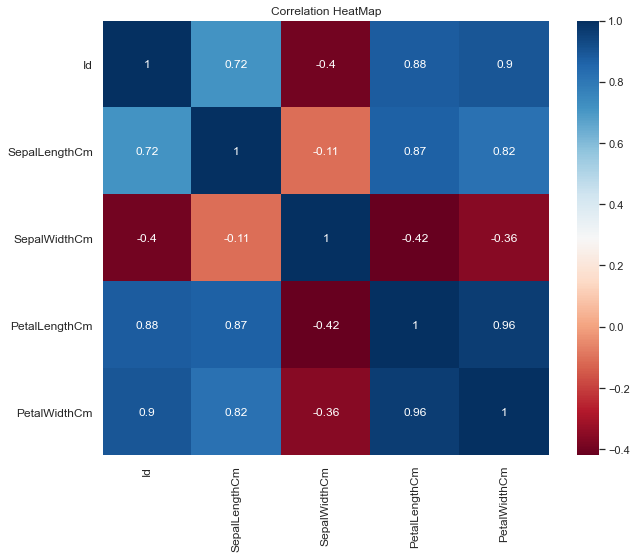

In [11]:
# Visualize the Correlation 
plt.figure(figsize=(10,8))
s = sns.heatmap(iris_data.corr(), annot =True, cmap='RdBu')
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation HeatMap')
plt.show()

In [17]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


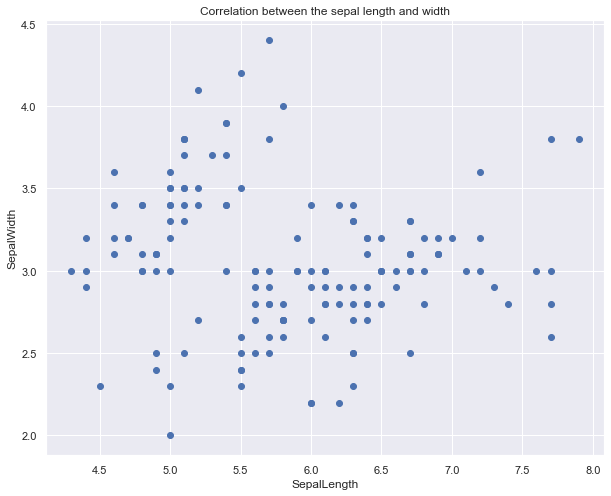

In [22]:
# Plotting a scatter plot for the sepal and petal length 
plt.figure(figsize=(10,8))
plt.scatter(iris_data.iloc[:, 1], iris_data.iloc[:, 2])
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.title('Correlation between the sepal length and width')
plt.show()


In [37]:
# now we will use the Hierarchical clustering first 
# load the libraries for clustering 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [32]:
iris_df = iris_data.iloc[:, 1:-1]
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [38]:
# no we should standardize the data
scaler = StandardScaler()

iris_std = scaler.fit_transform(iris_df)

In [39]:
hier_clust = linkage(iris_std, method='ward')

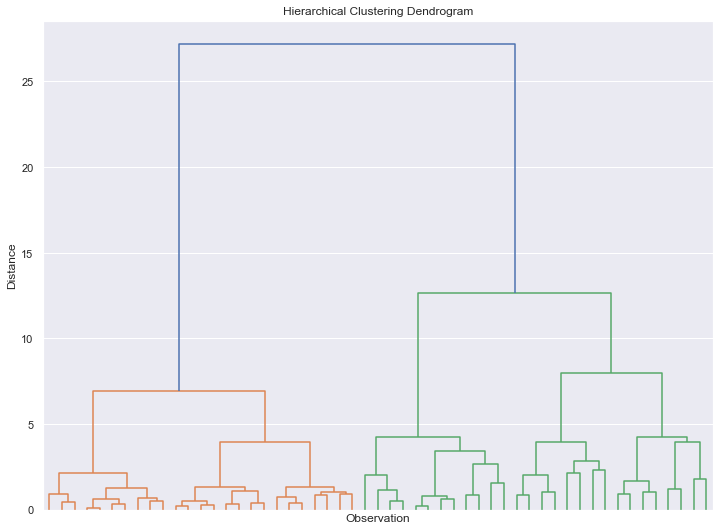

In [41]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observation')
plt.ylabel('Distance')

dendrogram(hier_clust, show_leaf_counts = False, no_labels = True, truncate_mode = 'level', p =5)
plt.show()

In [42]:
# Now we try for the Kmeans Clustering 
# First determine the number of cluster by the WCSS, kmeans++ method 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++', random_state = 42)
    kmeans.fit(iris_std)
    wcss.append(kmeans.inertia_)



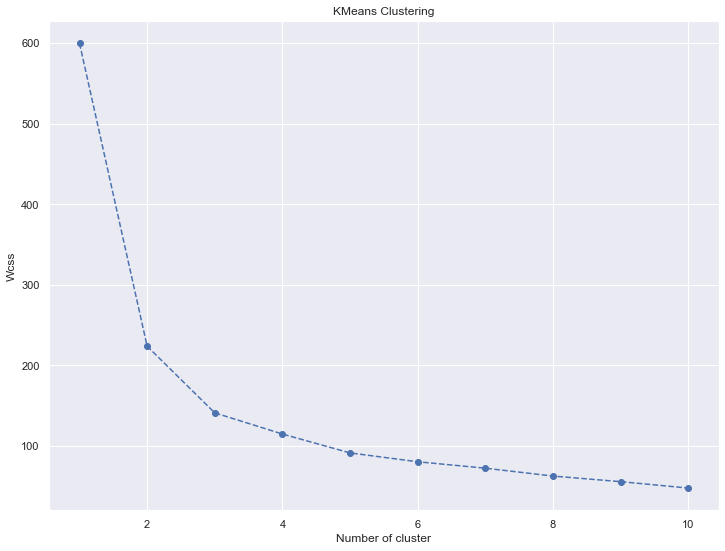

In [43]:
# Visualize the results 
plt.figure(figsize=(12,9))
plt.plot(range(1,11), wcss, marker='o', linestyle = '--')
plt.xlabel('Number of cluster')
plt.ylabel('Wcss')
plt.title('KMeans Clustering')
plt.show()

- From the elbow method we asure that the number of cluster is 3

In [44]:
# now perfome the KMeans clustering with 3 clusters 
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(iris_std)

KMeans(n_clusters=3, random_state=42)

In [45]:
# interpret the results 
# first we add the labels coming from the kmeans clustering 
df_iris_kmeans = iris_df.copy()
df_iris_kmeans['segment K-means'] = kmeans.labels_

In [46]:
df_iris_analysis = df_iris_kmeans.groupby(['segment K-means']).mean()
df_iris_analysis

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
segment K-means,,,,
0,5.006000,3.418000,1.464000,0.244000
1,6.780851,3.095745,5.510638,1.972340
2,5.801887,2.673585,4.369811,1.413208


In [47]:
# creat columns for number of observations and the porportion 
df_iris_analysis['N Obs'] = df_iris_kmeans[['segment K-means', 'SepalLengthCm']].groupby(['segment K-means']).count()

df_iris_analysis['Porp Obs'] = df_iris_analysis['N Obs'] / df_iris_analysis['N Obs'].sum()

In [48]:
df_iris_analysis

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,N Obs,Porp Obs
segment K-means,,,,,,
0,5.006000,3.418000,1.464000,0.244000,50,0.333333
1,6.780851,3.095745,5.510638,1.972340,47,0.313333
2,5.801887,2.673585,4.369811,1.413208,53,0.353333


In [52]:
# By Comparing the real data analysis from before to this analysis after the clustering we conclude
df_iris_analysis.rename({0: 'Iris-versicolour', 1: 'Iris-virginica', 2: 'Iris-setosa'})

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,N Obs,Porp Obs
segment K-means,,,,,,
Iris-versicolour,5.006000,3.418000,1.464000,0.244000,50,0.333333
Iris-virginica,6.780851,3.095745,5.510638,1.972340,47,0.313333
Iris-setosa,5.801887,2.673585,4.369811,1.413208,53,0.353333


In [53]:
# visualize the segmentations data by scatter plot 
# first we add the clusters labels to the data 

df_iris_kmeans['Labels'] = df_iris_kmeans['segment K-means'].map({0: 'Iris-versicolour',
                                                                  1: 'Iris-virginica', 
                                                                  2: 'Iris-setosa'})
                                                                 

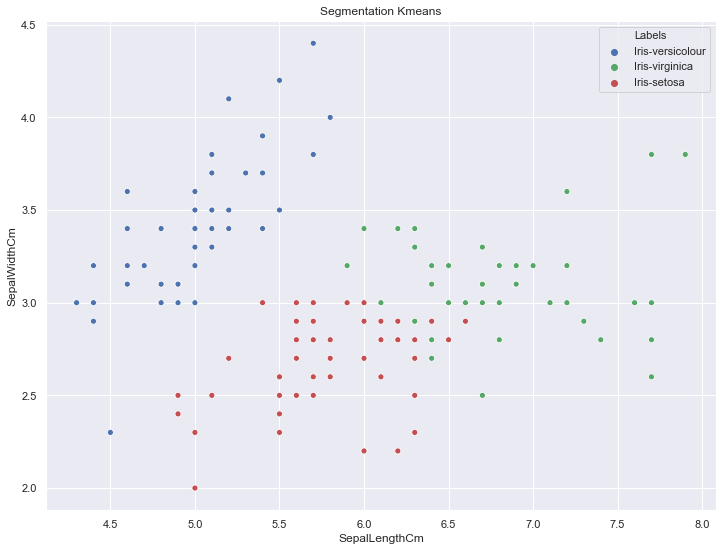

In [55]:
x_axis = df_iris_kmeans['SepalLengthCm']
y_axis = df_iris_kmeans['SepalWidthCm']
plt.figure(figsize=(12,9))
sns.scatterplot(x_axis, y_axis, hue= df_iris_kmeans['Labels'], palette =['b', 'g', 'r'])
plt.title('Segmentation Kmeans')
plt.show()

- These are the 3 clusters for the our dataset 